In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("salary.csv")
data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [4]:
# lets map the salary data to binary values
data.income = data.income.map({"<=50K" : 0, ">50K" : 1}).astype(int)
data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


In [25]:
# lets split our data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=0)

In [26]:
# lets do feature scaling
# we can also do that before splitting the data
# we have to scale the x_train with fit_transform and x_test with transform

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Text(0, 0.5, ' Mean Error')

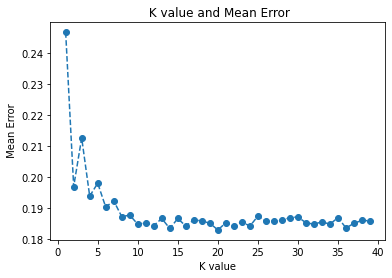

In [27]:
# calculating the error for K values from 1 to 40
from sklearn.neighbors import KNeighborsClassifier

error = []

for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    error.append(np.mean(prediction != y_test))

# lets plot the error rates of diff K values on graph
import matplotlib.pyplot as plt
plt.plot(range(1,40), error, linestyle = 'dashed', marker = 'o')
plt.title(" K value and Mean Error")
plt.xlabel("K value")
plt.ylabel(" Mean Error")

In [24]:
# we can see that k=20 gives least error and therefore is good value for k
# we can use metrics as Minkowski
# p value can be set to 1 : mathattan distance, 2 : Euclidean distance
model = KNeighborsClassifier(n_neighbors=20, metric='minkowski', p = 2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.812375249500998

In [29]:
# lets make a prediction 

age = input("Enter the employee's age : ")
edu = input("Enter the employee's education : ")
cg = input("Enter employee's capital gain : ")
wh = input("Enter employee's hours per week : ")

if (model.predict(scale.transform([[age,edu,cg,wh]])) == 1):
    print("Salary is above 50k")

else:
    print("Salary is below 50k")

Salary is above 50k


In [32]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))

cm

array([[4663,  303],
       [ 908,  639]], dtype=int64)

In [ ]:
# 4663 is true positive - means 4663 is predicted right
# 639 is true negative - means is true but wrongly classified
# 908 is false positive - 